In [ ]:
%matplotlib notebook

In [1]:
import numpy as np
import math
import pandas as pd
import random as rd
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
def Ree2(x,y,z):
    return ((x[0]-x[len(x)-1])**2+(y[0]-y[len(y)-1])**2+(z[0]-z[len(z)-1])**2)
def Rgx2(x,chain_length): 
    Rgx = np.sum((x - np.mean(x))**2)/chain_length
    return Rgx
def Rgy2(y,chain_length): 
    Rgy = np.sum((y - np.mean(y))**2)/chain_length
    return Rgy
def Rgz2(z,chain_length): 
    Rgz = np.sum((z - np.mean(z))**2)/chain_length
    return Rgz

In [3]:
def calculate_tensors(x,y,z,chain_length):
    xx = np.sum((x-np.mean(x))*(x-np.mean(x)))/chain_length
    xy = np.sum((x-np.mean(x))*(y-np.mean(y)))/chain_length
    xz = np.sum((x-np.mean(x))*(z-np.mean(z)))/chain_length
    yx = np.sum((y-np.mean(y))*(x-np.mean(x)))/chain_length
    yy = np.sum((y-np.mean(y))*(y-np.mean(y)))/chain_length 
    yz = np.sum((y-np.mean(y))*(z-np.mean(z)))/chain_length 
    zx = np.sum((z-np.mean(z))*(x-np.mean(x)))/chain_length 
    zy = np.sum((z-np.mean(z))*(y-np.mean(y)))/chain_length
    zz = np.sum((z-np.mean(z))*(z-np.mean(z)))/chain_length
    
    Sij = np.array([[xx,xy,xz],
                   [yx,yy,yz],
                   [zx,zy,zz]])
    return Sij

In [4]:
def diagonalize_tensor(rg_rensors):
    tensor_df = pd.DataFrame()
    for i in rg_tensors.index:# written by me
        temp_mat = np.zeros((3,3))
        temp_mat[0,:] = rg_tensors.loc[i,['XX','XY','XZ']].values
        temp_mat[1,:] = rg_tensors.loc[i,['XY','YY','YZ']].values
        temp_mat[2,:] = rg_tensors.loc[i,['XZ','YZ','ZZ']].values
        temp_mat = pd.DataFrame(np.sort(la.eig(temp_mat)[0].real)[::-1]).T
        temp_mat.columns = ['R1','R2','R3']
        tensor_df = tensor_df.append(temp_mat)
        if i%100000==0:
            print('Step: ', i,' complete')
    tensor_df.reset_index(drop=True)#.to_csv('gaussian_chain_moments.csv',index=False)
    return tensor_df.reset_index(drop=True)



In [5]:
def total_fixed_length(x,y,z):
    j=0
    seg_length=[]
    for chain_ind in np.arange(0,x.shape[0]):
        if x.shape[0]==y.shape[0] and y.shape[0]==z.shape[0]:
            bead_coor = np.array([x[chain_ind],y[chain_ind],z[chain_ind]])
            if j==0:
                no_change=1
            elif j>0 and j<=x.shape[0]:
                seg_length.append(((x[chain_ind]-x[chain_ind-1])**2+(y[chain_ind]-y[chain_ind-1])**2+(z[chain_ind]-z[chain_ind-1])**2)**0.5)

        else:
            print('error')
        j+=1
    return sum(seg_length)
    

# doodling

In [74]:
chain_length=100
x=np.array([i for i in range(1,51)])
x=np.append(x,[50]*50)
y=np.repeat(0,50)
y=np.append(y,)
z=np.repeat(0,chain_length)
ree2=Ree2(x,y,z)
rg2=Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length)
ratio=ree2/rg2
ratio

9.44578313253012

In [76]:
x.shape

(100,)

In [67]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [14]:
chain_length_list=[]
ratio_list=[]
rg2_list=[]
ree2_list=[]
for chain_length in range(1,1001):
    x=np.array([i for i in range(0,chain_length)])
    y=np.zeros(chain_length)
    y[::2]=1
    y[1::2]=0
    z=np.repeat(0,chain_length)
    ree2=Ree2(x,y,z)
    rg2=Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length)
    ratio=ree2/rg2
    chain_length_list.append(chain_length)
    ratio_list.append(ratio)
    ree2_list.append(ree2)
    rg2_list.append(rg2)

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [15]:
def Rs_straight(n):
    Rs = 12 * ((n-1)/(n+1))
    return Rs

In [18]:
plt.scatter(chain_length_list,np.array(ree2_list)/np.array(rg2_list),color='blue',s=50)


plt.scatter(chain_length_list, [Rs_straight(n) for n in chain_length_list],color='red',alpha=0.1,
          s=20)
plt.show()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [8]:
test = tentative_gaussian_chain_3d(100,35000,1,0,1)
print(test['ratio'].max())
x_coor=test[test.ratio==test['ratio'].max()]['x']
y_coor=test[test.ratio==test['ratio'].max()]['y']
z_coor=test[test.ratio==test['ratio'].max()]['z']

chain_length=100, Nosnaps=35000, interval= 1
25.19949109032381


In [9]:
test

,chain_length,Rg2,Rend2,ratio,x,y,z
0,100,30.655763,131.613830,4.293282,"[0.0, 1.2225132241053618, 1.2834190272493171, ...","[0.0, -0.16168943177464945, -0.812980127311074...","[0.0, 0.09338450604391423, 0.834445864593378, ..."
1,100,14.101591,48.684251,3.452394,"[0.0, 2.0496970452200673, 0.894666982186181, 0...","[0.0, -0.04793044862237195, 0.4430960874975134...","[0.0, 0.6061860013558629, 0.2872122522637751, ..."
2,100,69.724163,564.084599,8.090231,"[0.0, -0.28527265878702124, -0.480888209108189...","[0.0, -1.9534157885184686, -1.9946037296027992...","[0.0, -0.8165316691141011, 0.7650516399973324,..."
3,100,30.394500,200.194516,6.586538,"[0.0, -1.3492406201067686, -0.8636106429214164...","[0.0, -0.011055461782955, 0.07530768301247416,...","[0.0, 0.10537689597518034, -0.0854958363336472..."
4,100,42.971142,221.651445,5.158146,"[0.0, -0.2640686518181474, 0.41908203264738164...","[0.0, -1.6028231169806404, -1.6185062240126544...","[0.0, 2.16122775843417, 0.024528872100540333, ..."
...,...,...,...,...,...,...,...
34995,100,33.375801,198.415277,5.944884,"[0.0, 0.3101100504070724, -0.1620381475180197,...","[0.0, 0.25061545501698784, 0.9465326049931366,...","[0.0, 1.033165525546175, 0.49183743808297886, ..."
34996,100,34.029800,35.601380,1.046182,"[0.0, -0.5125960309364581, -1.1651387009997176...","[0.0, -0.5725267722891823, -1.0672670328865586...","[0.0, 1.4448989784082957, 0.6235485284496717, ..."
34997,100,62.384715,612.605105,9.819795,"[0.0, 1.0470000671291129, 2.3243212977627317, ...","[0.0, 1.7202584040369961, 0.6920639304776084, ...","[0.0, -0.37707040448709467, -0.039468615705541..."
34998,100,61.745192,258.717061,4.190076,"[0.0, 0.2112480778622759, 0.8786518850681801, ...","[0.0, -0.5636646126636407, 0.18861315187872651...","[0.0, 1.5545101129913292, 0.5172581076538196, ..."


In [21]:
data=np.c_[x_coor.values[0],y_coor.values[0],z_coor.values[0]]

In [10]:
ree2=Ree2(x_coor.values[0],y_coor.values[0],z_coor.values[0])
rg2=Rgx2(x_coor.values[0],len(x_coor.values[0]))+Rgy2(y_coor.values[0],len(y_coor.values[0]))+Rgz2(z_coor.values[0],len(z_coor.values[0]))
ree2/rg2

25.19949109032381

<IPython.core.display.Javascript object>


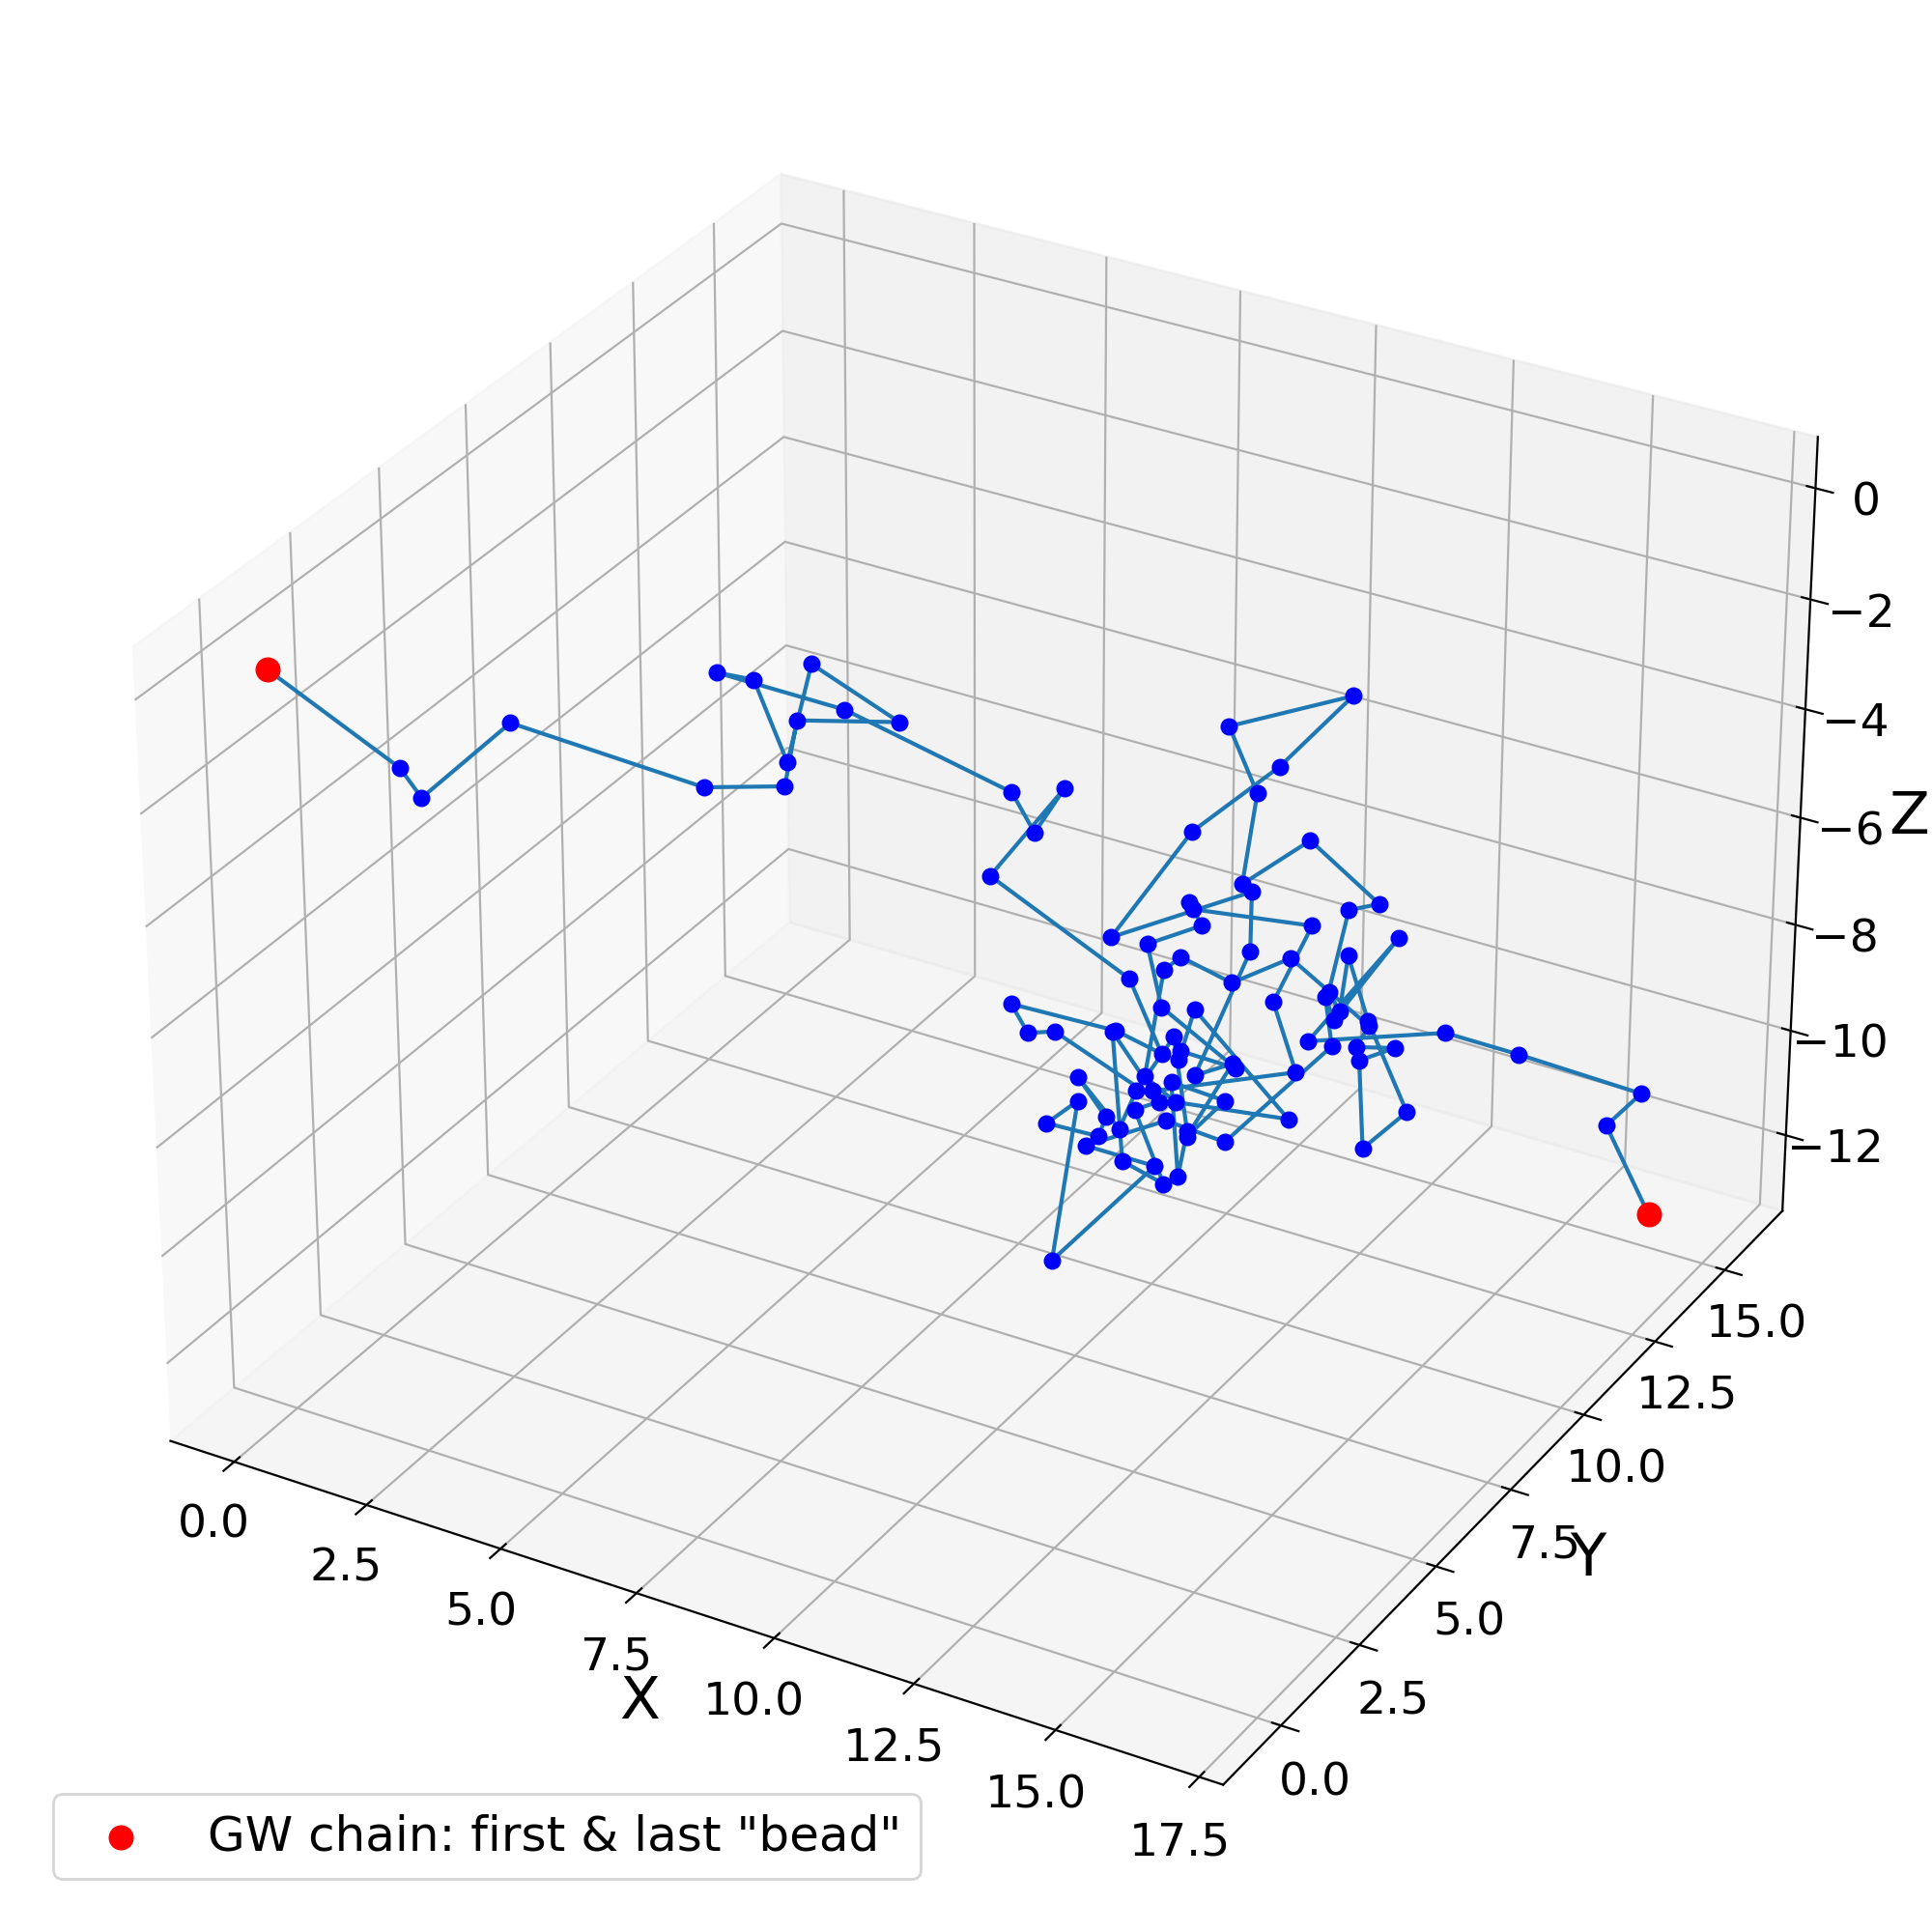

In [26]:
#%matplotlib ipympl

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

p=0
for i,j,k in zip(x_coor.values[0],y_coor.values[0],z_coor.values[0]):
    if p==0:
        ax.scatter(i,j,k,s=70,color='red',label='GW chain: first & last "bead"')
    elif p==len(x_coor.values[0])-1:
        ax.scatter(i,j,k,s=70,color='red')
    else:
        ax.scatter(i,j,k,s=30,color='blue')
    p+=1
ax.plot3D(x_coor.values[0],y_coor.values[0],z_coor.values[0])
# plt.scatter(1,55,3)
# plt.scatter(1.1,2.2,3.3)

plt.setp(ax.get_xticklabels(),fontsize=17)
plt.setp(ax.get_yticklabels(),fontsize=17)
plt.setp(ax.get_zticklabels(),fontsize=17)


ax.legend(fontsize=18,loc='lower left')    
ax.set_xlabel('X',fontsize=22)
ax.set_ylabel('Y',fontsize=22)
ax.set_zlabel('Z',fontsize=22)
plt.tight_layout()
plt.show()

plt.savefig(f'/home/hshadman/polym_sep/summary_SAW_RW/figures/GW_chain_conformation_example_ratio_{test["ratio"].max()}.png',
            dpi = 1000, bbox_inches='tight')


In [7]:
#gaussian chain code accounting for interval and nosnaps

def tentative_gaussian_chain_3d(chain_length,nosnaps,interval,mu,sigma):
    global Rend2,Rg2, shape_ratio, rg_tensors, x_coor, y_coor, z_coor
    chain_length=chain_length
    #no of steps
    x = np.zeros(chain_length)
    y = np.zeros(chain_length)
    z = np.zeros(chain_length)
    x_coor=[]
    y_coor=[]
    z_coor=[]
    nosnaps = nosnaps
    interval=interval
    step_size=1
    snapshot=0
    mu = mu
    sigma = sigma #kuhn length
    delta_x=[]
    delta_x2 = []
    Rend2 = []
    rg_tensors=pd.DataFrame(columns=['XX','XY','XZ','YX','YY','YZ','ZX','ZY','ZZ'])
    Rg2 = []
    shape_ratio=[]
    mean_sq_disp_i_master = []
    while snapshot<(nosnaps*interval):
        mean_sq_disp_i = []
        for i in range(1,chain_length,1):
            x[i] = x[i-1] + rd.gauss(mu,sigma)
            y[i] = y[i-1] + rd.gauss(mu,sigma)
            z[i] = z[i-1] + rd.gauss(mu,sigma)        
            mean_sq_disp_i.append((x[i]-x[0])**2)
        if snapshot in np.arange(0,(nosnaps*interval),interval):
            Rend2.append(Ree2(x,y,z))
            Rg2.append(Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length))
            shape_ratio.append(Ree2(x,y,z)/(Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length)))
            rg_tensors.loc[len(rg_tensors)]=calculate_tensors(x,y,z,chain_length).flatten()
            x_coor.append(list(x))
            y_coor.append(list(y))
            z_coor.append(list(z))
        snapshot = snapshot + 1   
    print(f'chain_length={chain_length}, Nosnaps={nosnaps}, interval= {interval}')   
    master_out=pd.DataFrame(np.array([Rg2,
                       Rend2,
                       shape_ratio]).T,columns=['Rg2','Rend2','ratio'])
    #master_out=pd.concat([master_out,diagonalize_tensor(rg_tensors)],axis=1)#be careful here if messing w/ master_out
    master_out.insert(0,'chain_length',np.repeat(chain_length,nosnaps))
    master_out['x']=x_coor
    master_out['y']=y_coor
    master_out['z']=z_coor
    return master_out

# doodling end

In [6]:
#gaussian chain code accounting for interval and nosnaps

def gaussian_chain_3d(chain_length,nosnaps,interval,mu,sigma):
    global Rend2,Rg2, shape_ratio, rg_tensors, x, y, z
    chain_length=chain_length
    #no of steps
    x = np.zeros(chain_length)
    y = np.zeros(chain_length)
    z = np.zeros(chain_length)
    nosnaps = nosnaps
    interval=interval
    step_size=1
    snapshot=0
    mu = mu
    sigma = sigma #kuhn length
    delta_x=[]
    delta_x2 = []
    Rend2 = []
    rg_tensors=pd.DataFrame(columns=['XX','XY','XZ','YX','YY','YZ','ZX','ZY','ZZ'])
    Rg2 = []
    shape_ratio=[]
    mean_sq_disp_i_master = []
    while snapshot<(nosnaps*interval):
        mean_sq_disp_i = []
        for i in range(1,chain_length,1):
            x[i] = x[i-1] + rd.gauss(mu,sigma)
            y[i] = y[i-1] + rd.gauss(mu,sigma)
            z[i] = z[i-1] + rd.gauss(mu,sigma)        
            mean_sq_disp_i.append((x[i]-x[0])**2)
        if snapshot in np.arange(0,(nosnaps*interval),interval):
            Rend2.append(Ree2(x,y,z))
            Rg2.append(Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length))
            shape_ratio.append(Ree2(x,y,z)/(Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length)))
            rg_tensors.loc[len(rg_tensors)]=calculate_tensors(x,y,z,chain_length).flatten()
        snapshot = snapshot + 1   
    print(f'chain_length={chain_length}, Nosnaps={nosnaps}, interval= {interval}')   
    master_out=pd.DataFrame(np.array([Rg2,
                       Rend2,
                       shape_ratio]).T,columns=['Rg2','Rend2','ratio'])
    master_out=pd.concat([master_out,diagonalize_tensor(rg_tensors)],axis=1)#be careful here if messing w/ master_out
    master_out.insert(0,'chain_length',np.repeat(chain_length,nosnaps))
    return master_out

In [ ]:
#generating final data for gaussian chain equivalent to RW, SAW
#need to add RSA afterwards
chain_lengths=[25,50,75,100,125,150]
nosnaps=30000
interval=100
mu=0
sigma=1
j=0
for chain in chain_lengths:
    if j==0:
        master=gaussian_chain_3d(chain,nosnaps,interval,mu,sigma)
    else:
        running=gaussian_chain_3d(chain,nosnaps,interval,mu,sigma)
        master=pd.concat([master,running],axis=0,ignore_index=True)
    j+=1

# ignore below -- only checking minor chain lengths. for dependence

In [ ]:
#need to check chain length dependence
chain_lengths=[2,5,7,10,14]
nosnaps=3000
interval=100
mu=0
sigma=1
j=0
for chain in chain_lengths:
    if j==0:
        master=gaussian_chain_3d(chain,nosnaps,interval,mu,sigma)
    else:
        running=gaussian_chain_3d(chain,nosnaps,interval,mu,sigma)
        master=pd.concat([master,running],axis=0,ignore_index=True)
    j+=1

In [21]:
master.to_csv("minor_gaussian_chain_master_out.csv",index=False)

Text(0, 0.5, 'Count')

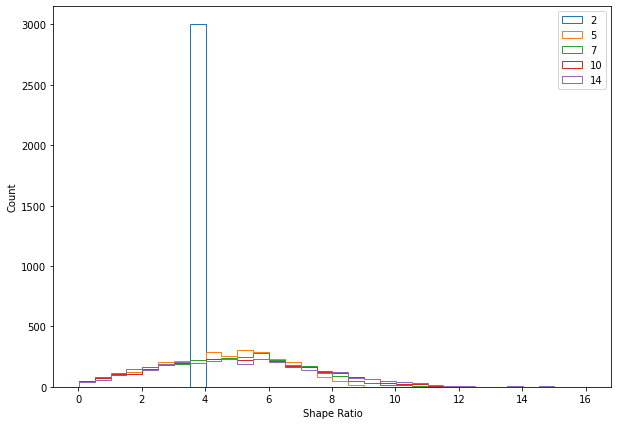

In [22]:
master=pd.read_csv("minor_gaussian_chain_master_out.csv")
fig, ax = plt.subplots(figsize=(10,7))
for chain_length in master.chain_length.unique():
    ax.hist(master[master.chain_length==chain_length].ratio,label=str(chain_length),histtype='step',
           bins=np.arange(master.ratio.min(),master.ratio.max(),0.5))
ax.legend()
plt.xlabel('Shape Ratio')
plt.ylabel('Count')

# proceed normally from here onwards (just reload the csv file gaussian_chain_master_out.csv and don't change it)

In [8]:
master['asphericity']=master.R1.values-(0.5*(master.R2.values+master.R3.values))
master['acylindricity']=master.R2.values-master.R3.values
master['RSA']=(master.asphericity.values**2+(0.75*master.acylindricity.values**2))/(master.R1.values+master.R2.values+master.R3.values)**2
master

,chain_length,Rg2,Rend2,ratio,R1,R2,R3,asphericity,acylindricity,RSA
0,25,7.616056,47.285894,6.208711,4.155140,2.723211,0.737705,2.424682,1.985506,0.152329
1,25,20.551210,105.724700,5.144451,14.695473,5.157975,0.697762,11.767605,4.460213,0.363196
2,25,9.356418,48.521862,5.185944,7.070639,1.706749,0.579030,5.927750,1.127718,0.412280
3,25,11.953089,33.337101,2.788995,6.314056,3.872324,1.766708,3.494540,2.105616,0.108745
4,25,9.817060,74.376410,7.576240,5.874690,3.032098,0.910272,3.903505,2.121826,0.193142
...,...,...,...,...,...,...,...,...,...,...
179995,150,44.698413,180.411130,4.036186,31.292708,9.880317,3.525389,24.589855,6.354928,0.317801
179996,150,60.146050,237.845683,3.954469,39.848506,15.352877,4.944666,29.699735,10.408211,0.266292
179997,150,150.051747,599.328136,3.994143,101.269815,41.461426,7.320506,76.878850,34.140920,0.301328
179998,150,35.779590,178.764942,4.996283,22.420734,7.826252,5.532605,15.741305,2.293647,0.196640


In [9]:
#DO NOT SAVE THIS FILE AGAIN
#master.to_csv("gaussian_chain_master_out.csv",index=False)

In [ ]:

diagonalized= diagonalize_tensor(rg_tensors)
diagonalized['asphericity']=diagonalized.R1.values-(0.5*(diagonalized.R2.values+diagonalized.R3.values))
diagonalized['acylindricity']=diagonalized.R2.values-diagonalized.R3.values
diagonalized['RSA']=((diagonalized.asphericity.values**2+(0.75*diagonalized.acylindricity.values**2))/(diagonalized.R1.values+diagonalized.R2.values+diagonalized.R3.values)**2)**0.5


Numpy array first has Rend2, then Rg2, then shape ratio


Text(0, 0.5, 'Shape Ratio')

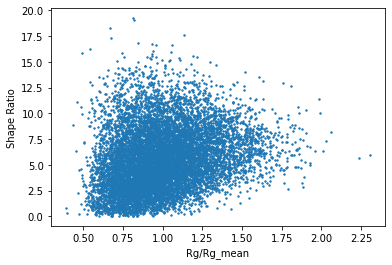

In [50]:
gaussian_chain = gaussian_chain_3d(1000,10000,5,0,1)

plt.scatter((gaussian_chain[1])**0.5/np.mean((gaussian_chain[1])**0.5),
           gaussian_chain[2],
           s=2)
plt.xlabel('Rg/Rg_mean')
plt.ylabel('Shape Ratio')


Text(0, 0.5, 'RSA')

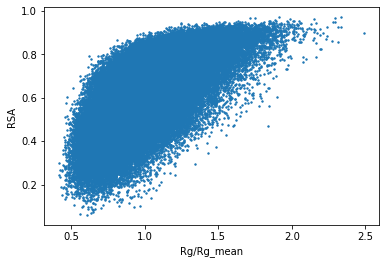

In [91]:
plt.scatter((diagonalized.R1.values+diagonalized.R2.values+diagonalized.R3.values)**0.5/((diagonalized.R1.values+diagonalized.R2.values+diagonalized.R3.values)**0.5).mean(),
            diagonalized.RSA.values,
           s=2)
plt.xlabel('Rg/Rg_mean')
plt.ylabel('RSA')


Text(0, 0.5, 'RSA')

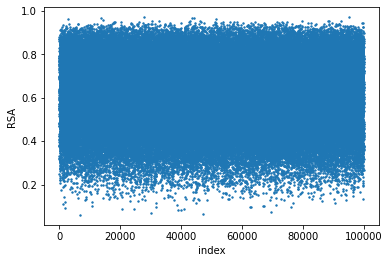

In [96]:
plt.scatter(diagonalized.index,diagonalized.RSA,s=2)
plt.xlabel('index')
plt.ylabel('RSA')


Text(0, 0.5, 'shape_ratio')

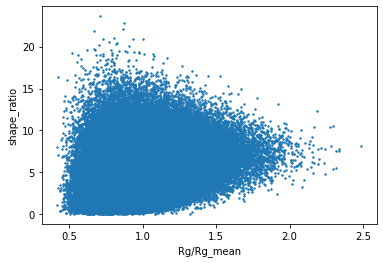

In [92]:
plt.scatter((diagonalized.R1.values+diagonalized.R2.values+diagonalized.R3.values)**0.5/((diagonalized.R1.values+diagonalized.R2.values+diagonalized.R3.values)**0.5).mean(),
            shape_ratio,
           s=2)
plt.xlabel('Rg/Rg_mean')
plt.ylabel('shape_ratio')


In [67]:
#gaussian chain code just accounting for nosnaps NOT interval
chain_length=101 #no of steps
x = np.zeros(chain_length)
y = np.zeros(chain_length)
z = np.zeros(chain_length)
nosnaps = 100000
interval=1
step_size=1
snapshot=1
mu = 0
sigma = 1 #kuhn length
delta_x=[]
delta_x2 = []
Rend2 = []
rg_tensors=pd.DataFrame(columns=['XX','XY','XZ','YX','YY','YZ','ZX','ZY','ZZ'])
Rg2 = []
shape_ratio=[]
mean_sq_disp_i_master = []
while snapshot<=nosnaps:
    mean_sq_disp_i = []
    for i in range(1,chain_length,1):
        x[i] = x[i-1] + rd.gauss(mu,sigma)
        y[i] = y[i-1] + rd.gauss(mu,sigma)
        z[i] = z[i-1] + rd.gauss(mu,sigma)        
        mean_sq_disp_i.append((x[i]-x[0])**2)
    Rend2.append(Ree2(x,y,z))
    Rg2.append(Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length))
    rg_tensors.loc[len(rg_tensors)]=calculate_tensors(x,y,z,chain_length).flatten()
    shape_ratio.append(Ree2(x,y,z)/(Rgx2(x,chain_length)+Rgy2(y,chain_length)+Rgz2(z,chain_length)))
    snapshot = snapshot + 1   
        

Text(0, 0.5, 'Rg')

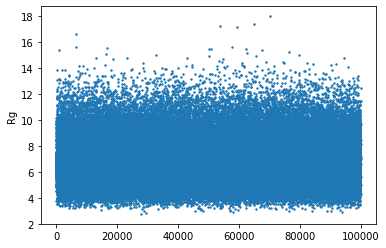

In [61]:
plt.scatter(np.arange(0,np.array(Rg2).shape[0]),
           np.array(Rg2)**0.5,
           s=2)
plt.ylabel('Rg')

Text(0, 0.5, 'End to End distance')

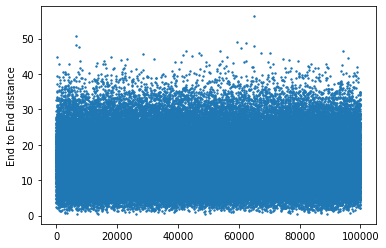

In [62]:
plt.scatter(np.arange(0,np.array(Rend2).shape[0]),
           np.array(Rend2)**0.5,
           s=2)
plt.ylabel('End to End distance')

Text(0, 0.5, 'Shape Ratio')

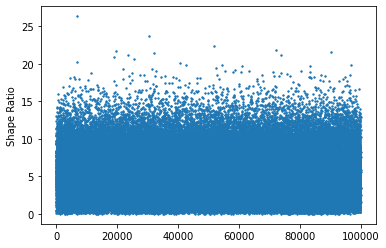

In [63]:
plt.scatter(np.arange(0,np.array(shape_ratio).shape[0]),
           np.array(shape_ratio),
           s=2)
plt.ylabel('Shape Ratio')

Text(0, 0.5, 'Shape Ratio')

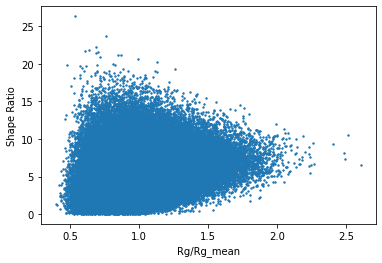

In [64]:
plt.scatter(np.array(Rg2)**0.5/np.mean(np.array(Rg2)**0.5),
           np.array(shape_ratio),
           s=2)
plt.xlabel('Rg/Rg_mean')
plt.ylabel('Shape Ratio')

array([8.89165318, 7.88049714, 7.54628722, ..., 6.47920464, 6.35853693,
       4.55188113])

In [ ]:
shape_ratio
plt.scatter(np.arange(0,np.array(Rend2).shape[0]),
           np.array(Rend2)/np.,
           s=2)
plt.ylabel('Shape Ratio')

In [49]:
if (np.median(np.arange(0,np.shape(x)[0]))).is_integer()==True:
    x_median_index = int(np.median(np.arange(0,np.shape(x)[0])))
    y_median_index = int(np.median(np.arange(0,np.shape(y)[0])))    
    z_median_index = int(np.median(np.arange(0,np.shape(z)[0])))    
    Rgx = np.sum((x - x[x_median_index])**2)/chain_length
    Rgy = np.sum((y - y[y_median_index])**2)/chain_length    
    Rgz = np.sum((z - z[z_median_index])**2)/chain_length    
elif (np.median(np.arange(0,np.shape(x)[0]))).is_integer()!=True:
    x_median_floor = int(np.floor(np.median(np.arange(0,np.shape(x)[0]))))
    x_median_ceiling = int(np.ceil(np.median(np.arange(0,np.shape(x)[0]))))    
    x_value_at_median_position = (x[x_median_floor]+x[x_median_ceiling])/2
    Rgx = np.sum((x - x_value_at_median_position)**2)/chain_length
    y_median_floor = int(np.floor(np.median(np.arange(0,np.shape(y)[0]))))
    y_median_ceiling = int(np.ceil(np.median(np.arange(0,np.shape(y)[0]))))    
    y_value_at_median_position = (y[y_median_floor]+y[y_median_ceiling])/2
    Rgy = np.sum((y - y_value_at_median_position)**2)/chain_length
    z_median_floor = int(np.floor(np.median(np.arange(0,np.shape(z)[0]))))
    z_median_ceiling = int(np.ceil(np.median(np.arange(0,np.shape(z)[0]))))    
    z_value_at_median_position = (z[z_median_floor]+z[z_median_ceiling])/2
    Rgz = np.sum((z - z_value_at_median_position)**2)/chain_length    

True

In [ ]:
    z_median_floor = int(np.floor(np.median(np.arange(0,np.shape(z)[0]))))
    z_median_ceiling = int(np.ceil(np.median(np.arange(0,np.shape(z)[0]))))    
    z_value_at_median_position = (z[z_median_floor]+z[z_median_ceiling])/2
    Rgz = np.sum((z - z_value_at_median_position)**2)/chain_length


In [113]:
avg=[]
for i in range(0,len(mean_sq_disp_i_master[0])):
    temp_i=[]
    for snap in mean_sq_disp_i_master:
        temp_i.append(snap[i])
    avg.append(sum(temp_i)/len(temp_i))
        


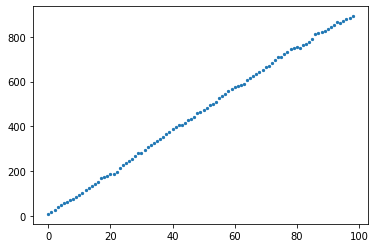

In [114]:
plt.scatter(range(0,len(mean_sq_disp_i_master[0])),
        avg,s=5)

# Generating some supplemental chain length data for fC issue

In [7]:
#this funciton is same as gaussian_chain_3d function but intended for multiple independent runs of single chain length
def gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,nosnaps,interval,mu,sigma):
    global final_master
    for k in range(1,no_of_runs+1):
        chain_lengths=[chain_length_choice]
        nosnaps=nosnaps
        interval=interval
        mu=mu
        sigma=sigma
        j=0
        for chain in chain_lengths:
            if j==0:
                master=gaussian_chain_3d(chain,nosnaps,interval,mu,sigma)
            else:
                running=gaussian_chain_3d(chain,nosnaps,interval,mu,sigma)
                master=pd.concat([master,running],axis=0,ignore_index=True)
            j+=1
        if k==1:   
            final_master=master.copy()
            final_master.insert(0,'run_number',np.repeat(k,final_master.shape[0]))
            print('1 run complete')
        elif k>1:
            master.insert(0,'run_number',np.repeat(k,master.shape[0]))
            final_master=pd.concat([final_master,master],axis=0,ignore_index=True)
            print(f'{k} runs complete')            
    return final_master

In [30]:
chain_length_choice=25
no_of_runs=6
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,100,0,1)

final_master.to_csv(f"gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)

chain_length=25, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=25, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=25, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=25, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=25, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=25, Nosnaps=30000, interval= 100
Step:  0  complete


In [31]:
final_master

,run_number,chain_length,Rg2,Rend2,ratio,R1,R2,R3
0,1,25,7.299729,19.852476,2.719618,5.115163,1.570145,0.614422
1,1,25,21.802719,153.553449,7.042858,19.743650,1.604439,0.454631
2,1,25,9.278507,18.540790,1.998251,7.809131,1.054460,0.414917
3,1,25,3.603878,20.045294,5.562145,2.369922,0.771666,0.462290
4,1,25,6.278338,52.371286,8.341584,3.839307,1.763682,0.675349
...,...,...,...,...,...,...,...,...
179995,6,25,6.957831,34.618245,4.975437,4.865565,1.164795,0.927471
179996,6,25,3.566236,27.786692,7.791601,1.764311,1.193902,0.608024
179997,6,25,50.199115,352.829727,7.028605,48.899709,0.795272,0.504134
179998,6,25,12.360483,177.753357,14.380777,10.562583,1.222151,0.575748


In [32]:
#ONLY for this chain length i did additional independent runs, this is first one
chain_length_choice=100
no_of_runs=6
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,100,0,1)

final_master.to_csv(f"gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)

chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete


In [16]:
#ONLY for this chain length i did additional independent runs, this is second one
chain_length_choice=100
no_of_runs=9
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,100,0,1)

final_master.to_csv(f"2nd_time_gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)

chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete


In [8]:

#ONLY for this chain length i did additional independent runs, this is third one
chain_length_choice=100
no_of_runs=6
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,100,0,1)

final_master.to_csv(f"3rd_time_gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)


chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 100
Step:  0  complete


In [8]:

#ONLY for this chain length i did additional independent runs, this is fourth one
#changed interval from 100 to 10 - it really doesn't matter which interval to use
chain_length_choice=100
no_of_runs=6
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,10,0,1)

final_master.to_csv(f"4th_time_gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)


chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete


In [9]:

#ONLY for this chain length i did additional independent runs, this is fifth one
#changed interval from 100 to 10 - it really doesn't matter which interval to use
chain_length_choice=100
no_of_runs=6
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,10,0,1)

final_master.to_csv(f"5th_time_gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)


chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete


In [10]:

#ONLY for this chain length i did additional independent runs, this is sixth one
#changed interval from 100 to 10 - it really doesn't matter which interval to use
chain_length_choice=100
no_of_runs=6
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,10,0,1)

final_master.to_csv(f"6th_time_gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)


chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete


In [11]:

#ONLY for this chain length i did additional independent runs, this is sixth one
#changed interval from 100 to 10 - it really doesn't matter which interval to use
chain_length_choice=100
no_of_runs=15
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,10,0,1)

final_master.to_csv(f"7th_time_gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)


chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete


In [12]:

#ONLY for this chain length i did additional independent runs, this is sixth one
#changed interval from 100 to 10 - it really doesn't matter which interval to use
chain_length_choice=100
no_of_runs=10
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,10,0,1)

final_master.to_csv(f"8th_time_gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)


chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=100, Nosnaps=30000, interval= 10
Step:  0  complete


In [33]:
chain_length_choice=150
no_of_runs=6
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,30000,100,0,1)

final_master.to_csv(f"gaussian_single_chain_length_{chain_length_choice}_{no_of_runs}_runs.csv",index=False)

chain_length=150, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=150, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=150, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=150, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=150, Nosnaps=30000, interval= 100
Step:  0  complete
chain_length=150, Nosnaps=30000, interval= 100
Step:  0  complete


In [34]:
final_master

,run_number,chain_length,Rg2,Rend2,ratio,R1,R2,R3
0,1,150,60.954992,179.760100,2.949063,41.008099,14.308135,5.638759
1,1,150,58.325877,338.035258,5.795631,43.985771,9.293561,5.046545
2,1,150,34.453698,143.478635,4.164390,20.239767,8.605546,5.608384
3,1,150,123.164893,1340.967663,10.887580,88.853908,27.155618,7.155367
4,1,150,92.593930,391.228731,4.225209,72.517861,15.909693,4.166376
...,...,...,...,...,...,...,...,...
179995,6,150,95.505108,354.279078,3.709530,78.665674,14.295665,2.543769
179996,6,150,60.350985,647.040995,10.721300,53.053878,4.761871,2.535236
179997,6,150,39.258015,124.322966,3.166817,20.498231,16.083985,2.675799
179998,6,150,73.289529,226.400704,3.089128,47.104262,23.144281,3.040986


# generating data due to reviewer comments

In [8]:
chain_length_choice=500
no_of_runs=67
no_snapshots=30000
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,no_snapshots,10,0,1)

final_master.to_csv(f"reviewer_gaussian_chain_length_{chain_length_choice}_{no_snapshots}_{no_of_runs}runs.csv",
                    index=False)


chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps=30000, interval= 10
Step:  0  complete
chain_length=500, Nosnaps

In [9]:
chain_length_choice=1000
no_of_runs=67
no_snapshots=30000
gaussian_chain_length_single_chain_length_multiple_runs(chain_length_choice,no_of_runs,no_snapshots,10,0,1)

final_master.to_csv(f"reviewer_gaussian_chain_length_{chain_length_choice}_{no_snapshots}_{no_of_runs}runs.csv",
                    index=False)


KeyboardInterrupt: 